In [2]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = sm.datasets.macrodata.load_pandas().data

In [4]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [5]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [6]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))

In [7]:
df.index = index

In [8]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


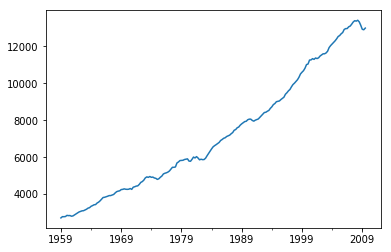

In [9]:
df['realgdp'].plot()

In [10]:
result = sm.tsa.filters.hpfilter(df['realgdp'])

In [11]:
cycle, trend = result

In [12]:
df['trend'] = trend

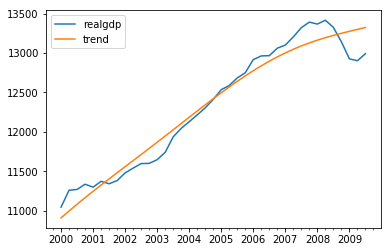

In [13]:
df[['realgdp', 'trend']]['2000-03-31':].plot()

In [14]:
airline = pd.read_csv('airline_passengers.csv', index_col='Month')

In [15]:
airline = airline.dropna()

In [16]:
airline.index = pd.to_datetime(airline.index)

In [17]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name=u'Month', length=144, freq=None)

In [18]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

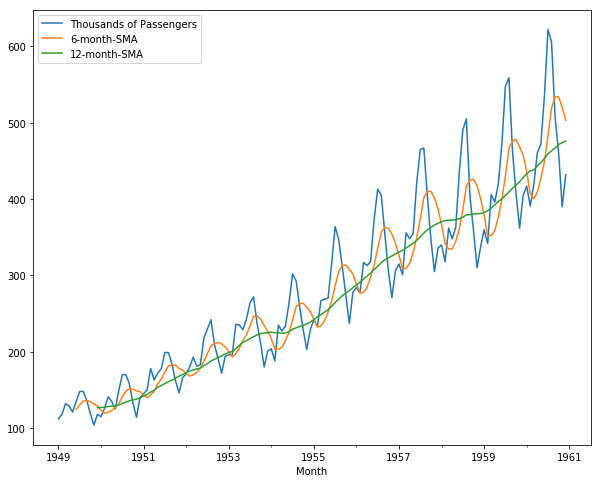

In [19]:
airline.plot(figsize=(10, 8))

In [20]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

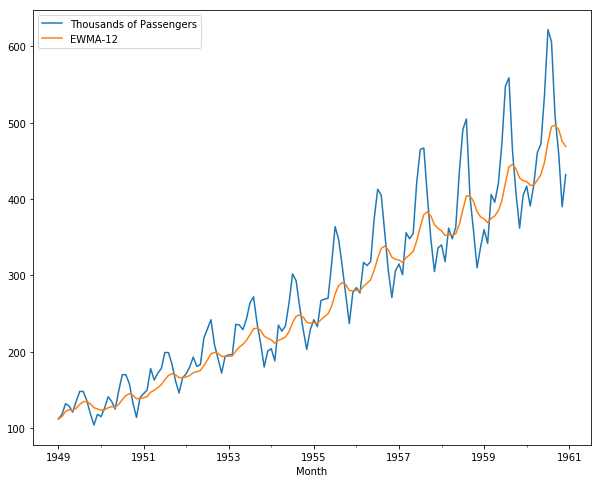

In [21]:
airline[['Thousands of Passengers', 'EWMA-12']].plot(figsize=(10, 8))

In [22]:
airline = pd.read_csv('airline_passengers.csv',index_col="Month")

In [23]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


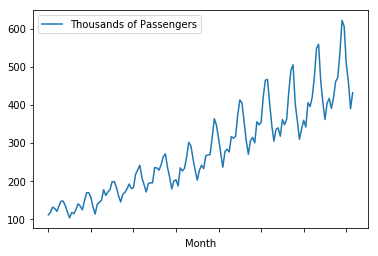

In [24]:
airline.plot()

In [25]:
airline.dropna(inplace=True)

In [26]:
airline.index = pd.to_datetime(airline.index)

In [27]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [32]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='additive')

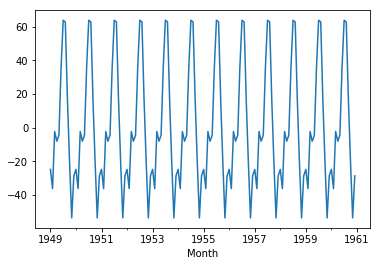

In [33]:
result.seasonal.plot()

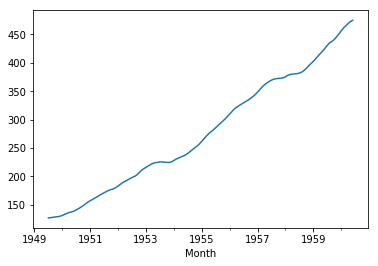

In [34]:
result.trend.plot()

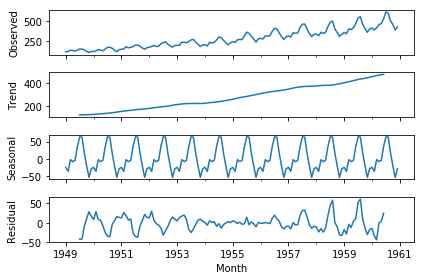

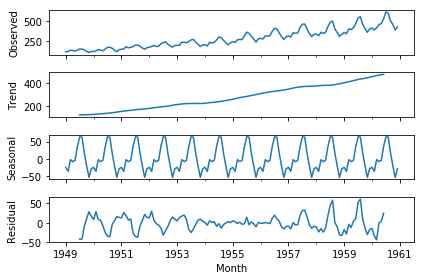

In [35]:
result.plot()

In [36]:
# ARIMA
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [38]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [39]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [44]:
df.columns = ['Month', 'Milk in Pounds per Cow']

In [45]:
df.drop(168, axis=0, inplace=True)

ValueError: labels [168] not contained in axis

In [46]:
df.tail()

,Month,Milk in Pounds per Cow
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [47]:
df['Month'] = pd.to_datetime(df['Month'])

In [49]:
df.set_index('Month', inplace=True)

In [50]:
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [53]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


In [55]:
# Step 2: vislualise

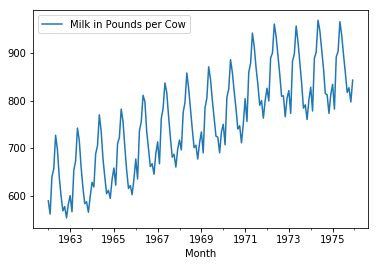

In [56]:
df.plot()

In [57]:
time_series = df['Milk in Pounds per Cow']

In [58]:
type(time_series)

pandas.core.series.Series

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose

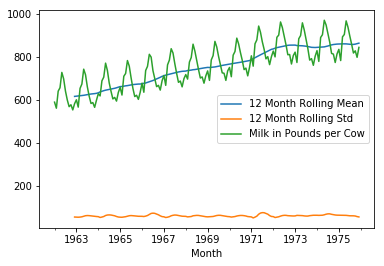

In [109]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean')
time_series.rolling(12).std().plot(label='12 Month Rolling Std')
time_series.plot()
plt.legend()

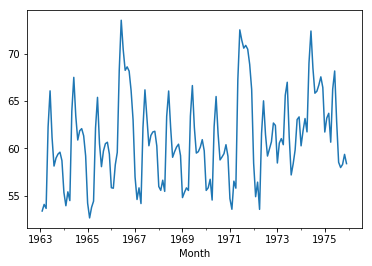

In [108]:
time_series.rolling(14).std().plot(label='14 Month Rolling Std')

In [103]:
decomp = seasonal_decompose(time_series)

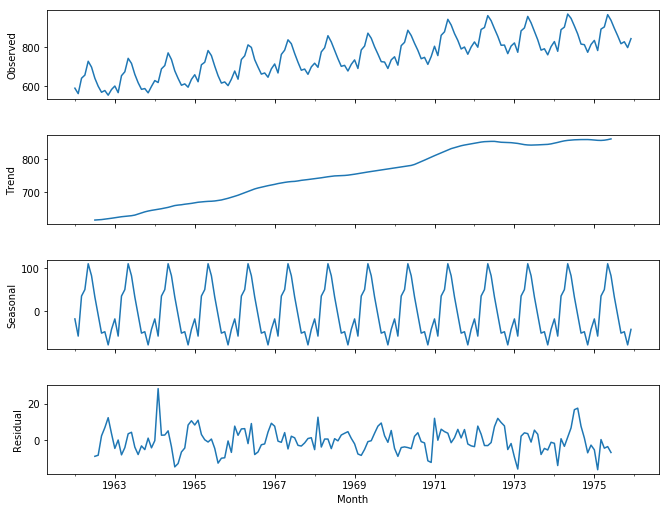

In [104]:
fig = decomp.plot()
fig.set_size_inches(10, 8)

In [88]:
from statsmodels.tsa.stattools import adfuller

In [89]:
result = adfuller(time_series)

In [90]:
result

(-1.3038115874221279,
 0.6274267086030323,
 13,
 154,
 {'1%': -3.473542528196209,
  '10%': -2.576878053634677,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [95]:
def adf_check(ts):
    result = adfuller(ts)
    print(" Augmented Dickey-Fuller test")
    labels = ['ADF Test Statistic', 'p-value', '# lags', 'Num obsersvations']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print('Strong evidence against null hypothesis')
        print('reject null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('Weak evidence against null hypothesis')
        print('Failed to reject null hypothesis')
        print('Data has a unit root, it is non-stationary')

In [96]:
adf_check(time_series)

 Augmented Dickey-Fuller test
ADF Test Statistic : -1.3038115874221279
p-value : 0.6274267086030323
# lags : 13
Num obsersvations : 154
Weak evidence against null hypothesis
Failed to reject null hypothesis
Data has a unit root, it is non-stationary


In [97]:
df['First Difference'] = time_series - time_series.shift(1)

In [98]:
adf_check(df['First Difference'].dropna())

 Augmented Dickey-Fuller test
ADF Test Statistic : -3.0549955586530677
p-value : 0.03006800400178584
# lags : 14
Num obsersvations : 152
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [113]:
df['Second Difference'] = time_series - time_series.shift(2)

In [114]:
adf_check(df['Second Difference'].dropna())

 Augmented Dickey-Fuller test
ADF Test Statistic : -3.068611819606499
p-value : 0.028964953375466042
# lags : 13
Num obsersvations : 152
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [118]:
df['Seasonal Difference'] = time_series - time_series.shift(12)

In [119]:
adf_check(df['Seasonal Difference'].dropna())

 Augmented Dickey-Fuller test
ADF Test Statistic : -2.3354193143594
p-value : 0.16079880527711288
# lags : 12
Num obsersvations : 143
Weak evidence against null hypothesis
Failed to reject null hypothesis
Data has a unit root, it is non-stationary


In [130]:
df['Seasonal First Difference'] = df['First Difference']  - df['First Difference'].shift(12)

In [131]:
adf_check(df['Seasonal First Difference'].dropna())

 Augmented Dickey-Fuller test
ADF Test Statistic : -5.038002274921973
p-value : 1.865423431878921e-05
# lags : 11
Num obsersvations : 143
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


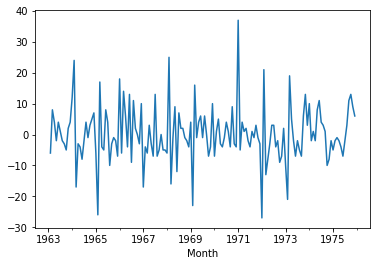

In [132]:
df['Seasonal First Difference'].plot()

In [133]:
# Part 3

In [134]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

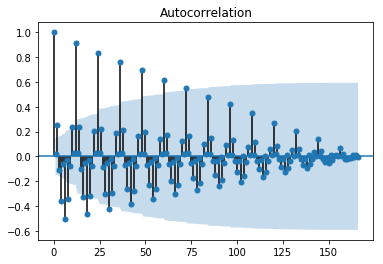

In [135]:
fig_first = plot_acf(df['First Difference'].dropna())

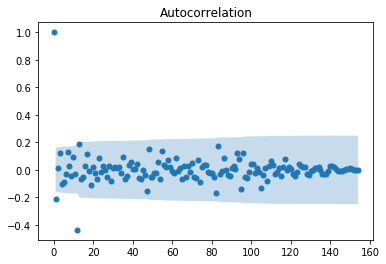

In [140]:
fig_seasonal_first = plot_acf(df['Seasonal First Difference'].dropna(), use_vlines=False)

In [138]:
from pandas.plotting import autocorrelation_plot

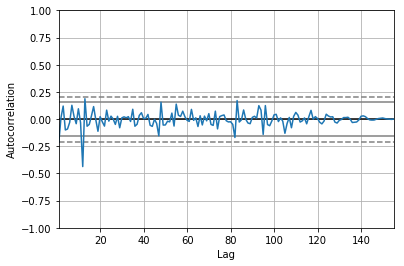

In [139]:
autocorrelation_plot(df['Seasonal First Difference'].dropna())

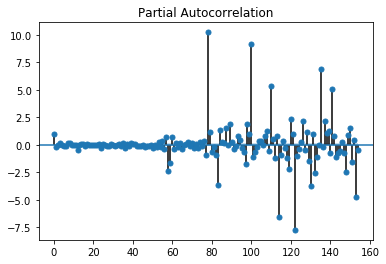

In [144]:
result = plot_pacf(df['Seasonal First Difference'].dropna())

In [146]:
# ARIMA at last

In [147]:
from statsmodels.tsa.arima_model import ARIMA

In [149]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array-like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array-like of datetime, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes
 |  -----
 |  If exogenous variables are given, then the model that is fit is
 

In [152]:
model = sm.tsa.statespace.SARIMAX(df["Milk in Pounds per Cow"], 
                                  order=(0, 1, 1), 
                                  seasonal_order=(1, 1, 1, 12))

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [153]:
results = model.fit()

In [156]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:             Milk in Pounds per Cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -530.015
Date:                            Sun, 23 Dec 2018   AIC                           1068.030
Time:                                    20:05:46   BIC                           1080.203
Sample:                                01-01-1962   HQIC                          1072.974
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2218      0.078     -2.838      0.005      -0.375      -0.069
ar.S.L12      -0.0617      0.111   

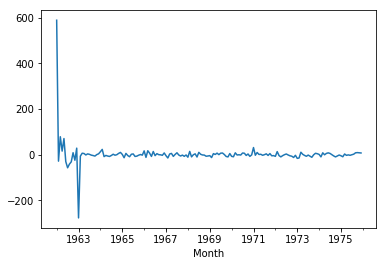

In [158]:
results.resid.plot()

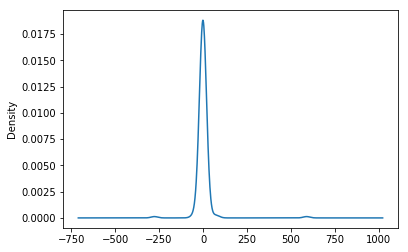

In [159]:
results.resid.plot(kind='kde')

In [160]:
df['forecast'] = results.predict(start=150, end=168)

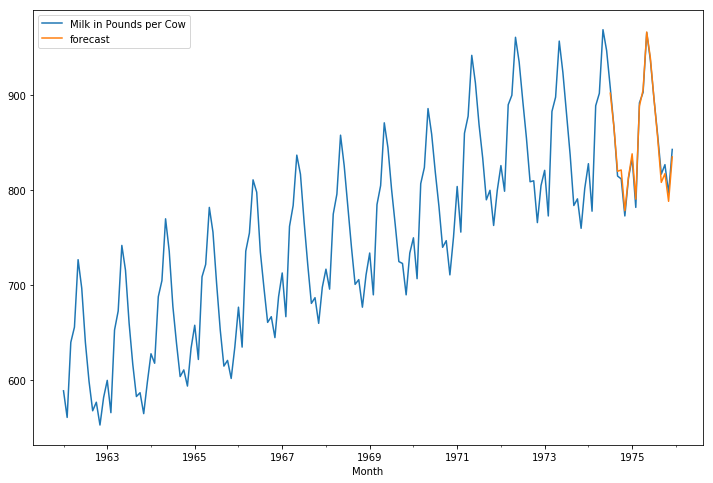

In [164]:
df[['Milk in Pounds per Cow', 'forecast']].plot(figsize=(12, 8))

In [165]:
from pandas.tseries.offsets import DateOffset

In [170]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1, 24)]

In [171]:
future_dates

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [173]:
future_df = pd.DataFrame(index=future_dates, columns=df.columns)

In [174]:
future_df

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-10-01,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
final_df = pd.concat([df, future_df])

In [177]:
final_df

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN,NaN
1962-03-01,640.0,79.0,51.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,95.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,87.0,NaN,NaN,NaN
1962-06-01,697.0,-30.0,41.0,NaN,NaN,NaN
1962-07-01,640.0,-57.0,-87.0,NaN,NaN,NaN
1962-08-01,599.0,-41.0,-98.0,NaN,NaN,NaN
1962-09-01,568.0,-31.0,-72.0,NaN,NaN,NaN
1962-10-01,577.0,9.0,-22.0,NaN,NaN,NaN


In [178]:
final_df['forecast'] = results.predict(start=168,end=192)

In [181]:
final_df.tail()

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,948.916725
1977-08-01,NaN,NaN,NaN,NaN,NaN,909.295554
1977-09-01,NaN,NaN,NaN,NaN,NaN,863.214614
1977-10-01,NaN,NaN,NaN,NaN,NaN,868.316785
1977-11-01,NaN,NaN,NaN,NaN,NaN,834.215476


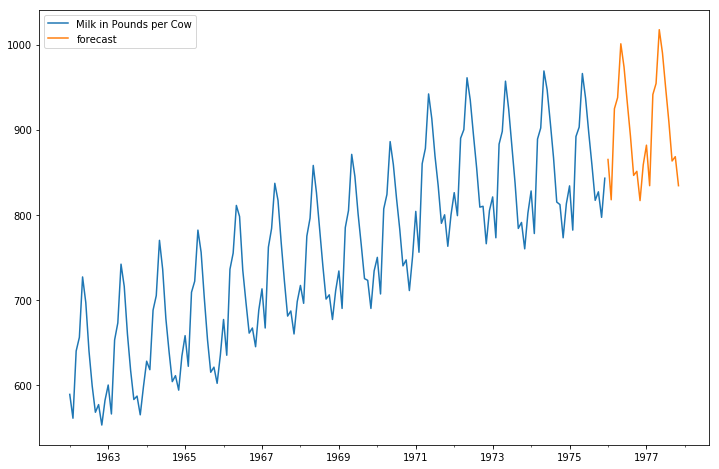

In [186]:
final_df[['Milk in Pounds per Cow', 'forecast']].plot(figsize=(12, 8))